In [1]:
import argparse
import matplotlib.pyplot as plt
import re

In [8]:
def find_float(line):
    """Find and return last floating in line

    Arguments:
        line {string} -- line of text

    Returns:
        float -- last floating number in line
    """

    return float(re.findall(r"[-+]?\d*\.\d+|\d+", line)[-1])


def chunks(l, n):
    """Yield successive n-sized chunks from l

    Arguments:
        l {list} -- list to split
        n {int} -- chunk size
    """

    for i in range(0, len(l), n):
        yield l[i:i + n]


def process_and_plot(path):
    """Process data and plot training curves

    Arguments:
        path {string} -- log file path
    """

    with open(path, 'r') as file:
        lines = list(file)
        print('Read log file [{}]'.format(path))

    train_losses = [
        find_float(line) for line in lines if 'Train loss:' in line]
    test_losses = [
        find_float(line) for line in lines if 'Test loss:' in line]

    num_all = len(train_losses)
    num_each = num_all // 4

    train_iterator = chunks(train_losses, num_each)
    train_losses_msa = next(train_iterator)
    #train_losses_sgd = next(train_iterator)
    #train_losses_adagrad = next(train_iterator)
    #train_losses_adam = next(train_iterator)

    test_iterator = chunks(test_losses, num_each)
    test_losses_msa = next(test_iterator)
    #test_losses_sgd = next(test_iterator)
    #test_losses_adagrad = next(test_iterator)
    #test_losses_adam = next(test_iterator)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.semilogy(train_losses_msa, '-', label='MSA')
    #ax1.semilogy(train_losses_sgd, ':', label='SGD')
    #ax1.semilogy(train_losses_adagrad, '--', label='Adagrad')
    #ax1.semilogy(train_losses_adam, '-.', label='Adam')
    ax1.set_title('Test losses')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.semilogy(test_losses_msa, '-', label='MSA')
    #ax2.semilogy(test_losses_sgd, ':', label='SGD')
    #ax2.semilogy(test_losses_adagrad, '--', label='Adagrad')
    #ax2.semilogy(test_losses_adam, '-.', label='Adam')
    ax2.set_title('Train losses')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.show()

In [7]:
process_and_plot('sin.log')

Read log file [sin.log]


ValueError: range() arg 3 must not be zero

Read log file [mnist.log]


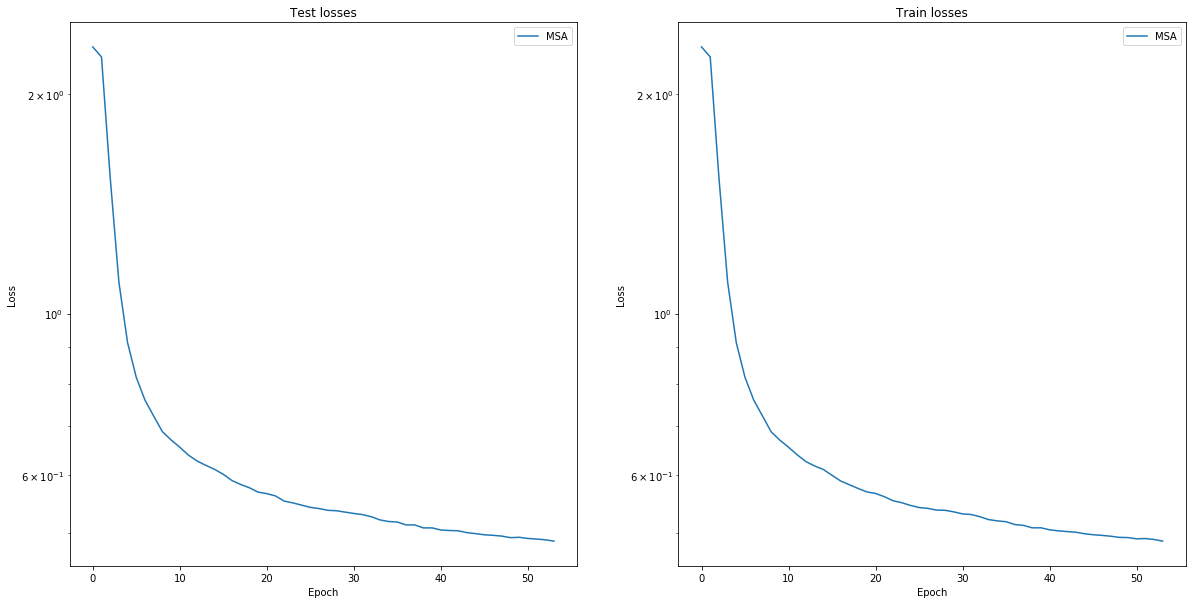

In [8]:
process_and_plot('mnist.log')